### Notebook Summary

This notebook applies a Decision Tree Classifier to predict the outcome of Premier League football matches using betting odds data. The task involves:

- Loading and exploring the cleaned dataset.
- Selecting relevant numeric features: average odds for home win, draw, and away win.
- Defining the target variable (`home_outcome`), which represents the actual result of the match.
- Splitting the dataset into training and test sets using `train_test_split`.
- Training a decision tree with a maximum depth of 5.
- Evaluating the model using accuracy, a confusion matrix, and a classification report to assess its predictive performance.
- Visualizing the trained decision tree using Graphviz to understand how the model makes decisions based on the input features.

This Notebook demonstrates a basic supervised classification workflow suitable for introductory machine learning tasks involving categorical outcomes.


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz


### Load the Dataset

In [ ]:
df = pd.read_csv("../data/cleaned-premier-league-data.csv")


print(df.head())


print(df.shape)
print(df.info())


         date     season    home_team    away_team  home_outcome  \
0  2015-08-08  2015/2016  Bournemouth  Aston Villa             0   
1  2015-08-08  2015/2016      Chelsea      Swansea             1   
2  2015-08-08  2015/2016      Everton      Watford             1   
3  2015-08-08  2015/2016    Leicester   Sunderland             2   
4  2015-08-08  2015/2016   Man United    Tottenham             2   

   avg_odd_home_win  avg_odd_draw  avg_odd_away_win  home_ranking  \
0             7.024         3.303             3.748            20   
1             6.697         4.338             8.967             1   
2             6.842         3.514             4.852            11   
3             7.000         3.207             3.742            14   
4             6.477         3.651             5.318             4   

   away_ranking  home_total_wins_so_far  home_total_draws_so_far  \
0            17                       0                        0   
1             8                       0 

### Explore and Understand the Data

       home_outcome  avg_odd_home_win  avg_odd_draw  avg_odd_away_win  \
count   1246.000000       1246.000000   1246.000000       1246.000000   
mean       1.133226          7.274838      4.441469          3.684693   
std        0.851120          1.043937      1.647506          1.604586   
min        0.000000          5.463000      2.935000          2.005000   
25%        0.000000          6.492000      3.250000          2.544750   
50%        1.000000          7.056000      3.535000          3.197000   
75%        2.000000          7.885250      6.383250          4.292000   
max        2.000000         10.355000      9.088000          9.057000   

       home_ranking  away_ranking  home_total_wins_so_far  \
count   1246.000000   1246.000000             1246.000000   
mean      11.114767     10.463082                5.401284   
std        5.542721      5.693638                4.181174   
min        1.000000      1.000000                0.000000   
25%        7.000000      6.000000    

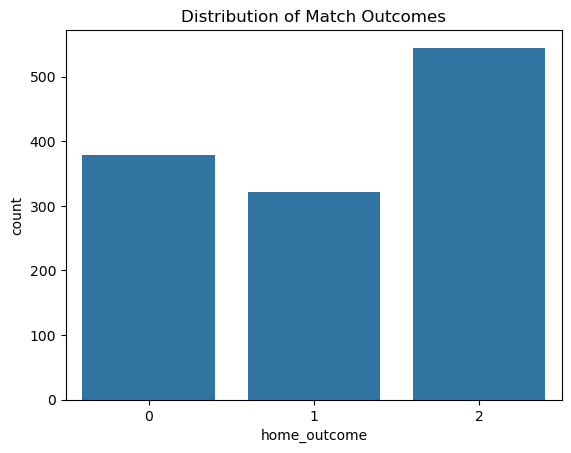

In [6]:
# Basic stats
print(df.describe())

# Visualize how often each outcome (Home Win, Draw, Away Win) occurs
sns.countplot(x='home_outcome', data=df)
plt.title("Distribution of Match Outcomes")
plt.show()

### Define Features and Labels

In [7]:
# Use 3 average betting odds as input features
features = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']
X = df[features]

# Define the target variable — the actual match outcome
y = df['home_outcome']

### Train-Test Split

In [8]:
# Split the data into training and test sets (80% train / 20% test)
# Stratify ensures class proportions are the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### Train the Decision Tree Model

In [9]:
# Create decision tree with max depth 5 to prevent overfitting
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train on training set
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

### Evaluate the Model

In [10]:
# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy (overall correct predictions)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show confusion matrix to compare actual vs. predicted values
cm = confusion_matrix(y_test, y_pred)
cm


Accuracy: 0.492


array([[36, 15, 25],
       [19, 17, 29],
       [17, 22, 70]], dtype=int64)

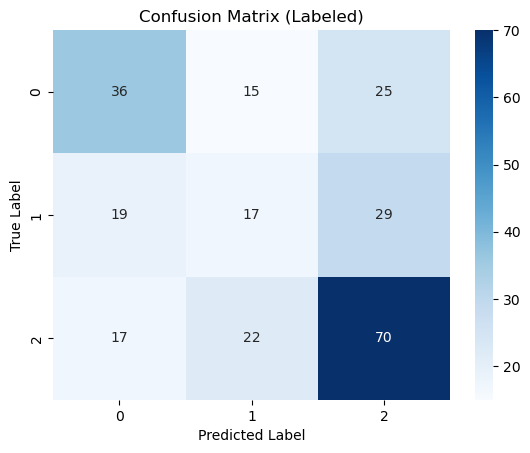

In [11]:
from sklearn.utils.multiclass import unique_labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Define class labels
class_labels = clf.classes_  # typically ['H', 'D', 'A']

# Plot confusion matrix with labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Labeled)")
plt.show()


**Confusion Matrix Analysis**

The model performs best when predicting **Away Wins**, correctly identifying 70 matches. However, it struggles with the other outcomes:

- **Draws:** Only 17 out of 65 actual draws were predicted correctly.
- **Home Wins:** 36 out of 76 actual home wins were correctly predicted.

This indicates the model has difficulty distinguishing **draw outcomes**, which is a common challenge in football prediction due to the ambiguous nature of draw odds and less distinguishable patterns.


Model Evaluation Explained

    Accuracy: Overall percentage of correct predictions.

    Confusion Matrix: Shows correct vs. incorrect predictions for each class.

    Classification Report:

        Precision: Correct predictions out of all predicted for a class.

        Recall: Correct predictions out of all actual instances of that class.

        F1-score: Balance between precision and recall.

        Support: Number of actual examples per class.

Includes:

    Macro avg: Equal average across classes.

    Weighted avg: Average based on class sizes (useful for imbalance).

### Visualize the Decision Tree

In [12]:
class_labels = [str(label) for label in clf.classes_]

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=features,
                           class_names=class_labels,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("premier_league_tree")  # saves as PDF
graph.view()

'premier_league_tree.pdf'

### Save model

In [13]:
import joblib

# Save the model
joblib.dump(clf, '../data/decision_tree_model.pkl')

['../data/decision_tree_model.pkl']